<a href="https://colab.research.google.com/github/OSegun/Zummit-Africa-ML-AL-Projects/blob/main/ZA02_RandomForestRegressor_MelB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The task is to provide a machine learning model with RandomForestRegressor model to predict the housing price of Melbourne
The dataset contains the following features:
- Suburb: Suburb
- Address: Address
- Rooms: Number of rooms
- Price: Price in Australian dollars
- Method: Property S - Sold, SP - Sold Prior, PI - Passed In, PN - Sold Prior Not Disclosed, SN - Sold Not Disclosed, NB - No Bid, VB - Vendor Bid, W - Withdrawn Prior to Auction, SA - Sold After Auction, SS - Sold After Auction Price Not Disclosed.
- Type: br - bedroom(s), h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse, dev site - development site, o res - other residential.
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from CBD in Kilometres
- Regionname: General Region (West, North West, North, North east …etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size in Metres
- BuildingArea: Building Size in Metres
- YearBuilt: Year the house was built
- CouncilArea: Governing council for the area
- Lattitude: Geographical location on the map
- Longtitude: Geographical location on the map

The Melb House Price Dataset can be accessed via the kaggle website link https://www.kaggle.com/code/odusinaoluwasegun/exercise-random-forests/edit

In [1]:
#import necessary libaries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [64]:
house_df = pd.read_csv('/content/melb_data.csv') # reading the dataset to pandas
house_df.head() # Display the first few roles of the dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [65]:
house_df.shape # Number of features and rows

(13580, 21)

In [66]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [67]:
house_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [69]:
house_df.isna().sum() # Checking for missing values

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [70]:
house_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [71]:
new_df  = house_df.copy() # Copy the new dataframe into another new dataframe to avoid settingswithcopy warning

new_df = new_df.drop(['BuildingArea', 'SellerG', 'YearBuilt', 'CouncilArea', 'Suburb', 'Address', 'Date'], axis=1)

In [72]:
new_df.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,h,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,94.0,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,-37.8072,144.9941,Northern Metropolitan,4019.0


<AxesSubplot:>

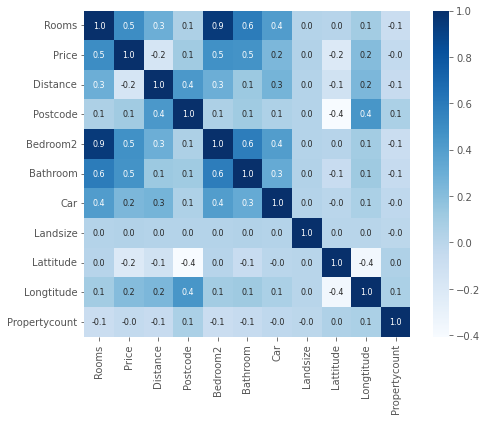

In [73]:
correlation = new_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

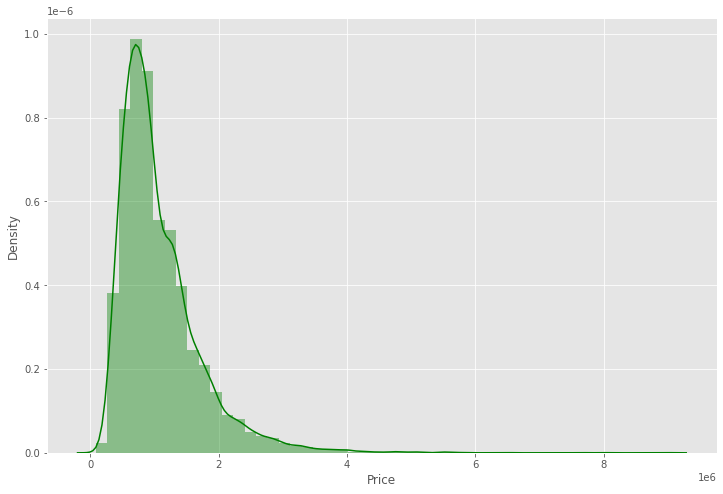

In [74]:
sns.distplot(new_df['Price'],color='green')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='new_price', ylabel='Density'>

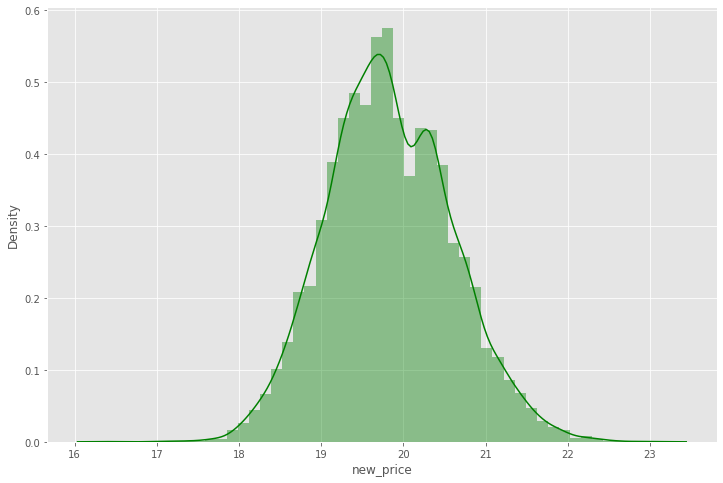

In [75]:
#From the distribution plot there are noticeable biases because the target column is right skewed and can be corrected with the log transformation.
new_df['new_price'] = np.log2(new_df["Price"])

sns.distplot(new_df['new_price'],color='green')

In [76]:
new_df['Type'].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [77]:
new_df['Method'].value_counts()

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64

In [78]:
new_df['Regionname'].value_counts()

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

In [79]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [80]:
# Transforming all needed categorical features to numuric values with encoding
new_df['Type'] = encoder.fit_transform(new_df['Type'])
new_df['Method'] = encoder.fit_transform(new_df['Method'])
new_df['Regionname'] = encoder.fit_transform(new_df['Regionname'])

In [81]:
new_df.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,new_price
0,2,0,1480000.0,1,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,2,4019.0,20.497166
1,2,0,1035000.0,1,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,2,4019.0,19.981199
2,3,0,1465000.0,3,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,2,4019.0,20.482469
3,3,0,850000.0,0,2.5,3067.0,3.0,2.0,1.0,94.0,-37.7969,144.9969,2,4019.0,19.697103
4,4,0,1600000.0,4,2.5,3067.0,3.0,1.0,2.0,120.0,-37.8072,144.9941,2,4019.0,20.609640


In [82]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  int64  
 1   Type           13580 non-null  int64  
 2   Price          13580 non-null  float64
 3   Method         13580 non-null  int64  
 4   Distance       13580 non-null  float64
 5   Postcode       13580 non-null  float64
 6   Bedroom2       13580 non-null  float64
 7   Bathroom       13580 non-null  float64
 8   Car            13518 non-null  float64
 9   Landsize       13580 non-null  float64
 10  Lattitude      13580 non-null  float64
 11  Longtitude     13580 non-null  float64
 12  Regionname     13580 non-null  int64  
 13  Propertycount  13580 non-null  float64
 14  new_price      13580 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 1.6 MB


In [83]:
new_df['Car'].fillna(value = new_df['Car'].mean(), inplace=True) # filling all missing values in the Car feature with their mean

In [84]:
new_df.isna().sum()

Rooms            0
Type             0
Price            0
Method           0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
new_price        0
dtype: int64

In [85]:
# Spliting the dataset into input and ouput or features and target
X = np.asarray(new_df.drop(['Price', 'new_price'], axis=1)) # Features
y = np.asarray(new_df['new_price']) # Target

In [86]:
print(X)
print(y)

[[2.0000000e+00 0.0000000e+00 1.0000000e+00 ... 1.4499840e+02
  2.0000000e+00 4.0190000e+03]
 [2.0000000e+00 0.0000000e+00 1.0000000e+00 ... 1.4499340e+02
  2.0000000e+00 4.0190000e+03]
 [3.0000000e+00 0.0000000e+00 3.0000000e+00 ... 1.4499440e+02
  2.0000000e+00 4.0190000e+03]
 ...
 [3.0000000e+00 0.0000000e+00 1.0000000e+00 ... 1.4488738e+02
  6.0000000e+00 6.3800000e+03]
 [4.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.4489299e+02
  6.0000000e+00 6.3800000e+03]
 [4.0000000e+00 0.0000000e+00 3.0000000e+00 ... 1.4488449e+02
  6.0000000e+00 6.5430000e+03]]
[20.49716575 19.98119934 20.48246923 ... 20.1580771  21.25349666
 20.29333693]


In [87]:
# Spliting the features and target into 70% train and 30% test 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [88]:
print((X_train.shape[0] / X.shape[0]) * 100)
print((X_test.shape[0] / X.shape[0]) * 100)
print((Y_train.shape[0] / y.shape[0]) * 100)
print((Y_test.shape[0] / y.shape[0]) * 100)

70.0
30.0
70.0
30.0


In [89]:
model = RandomForestRegressor()  # Instanstiating the Random Forest model for use

In [90]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [91]:
from sklearn.metrics import mean_absolute_error
pred = model.predict(X_test)
mean_absolute_error(Y_test, pred)

0.20883077818422857

In [92]:
model.score(X_test,Y_test)

0.8584565390320352

In [93]:
X_test_prediction = model.predict(X_test)

In [94]:
error_score = metrics.r2_score(Y_test, X_test_prediction)
print('R square error : ', error_score)

R square error :  0.8584565390320352


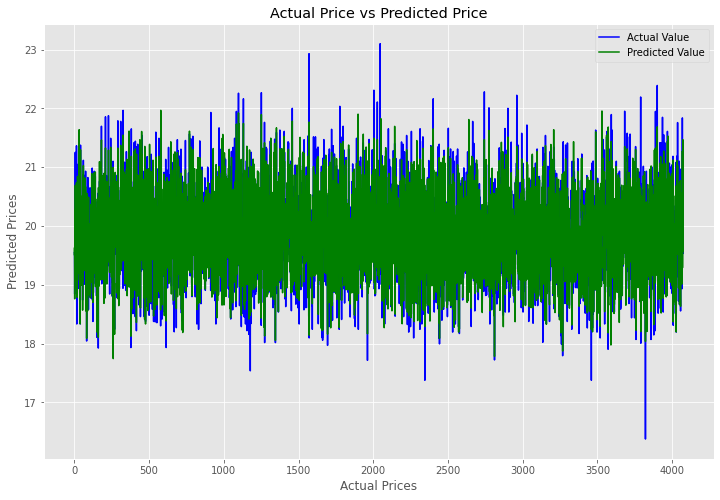

In [95]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(X_test_prediction, color='green', label = 'Predicted Value')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.show()

## Conclusion

From the model above, with a test accuracy of 85%. The model accuracy is good enough and can still be further optimized to get the best accuracy that will help predict our housing dataset. From the plot above the predicted value and the actual value both follow similar patterns.